# Explorando o Visualizações com o Matplotlib

Até agora vimos como a vizualização de dados pode ser interessante para nos ajudar a:
- entender a estrutura interna dos dados que estamos trabalhando.
- tirar insights sobre possíveis padrões escondidos.

Nesse notebook, vamos explorar diferentes formas de visualização, sua aplicações e exemplos.



## Principais tipos de visualizações

### Quantidades

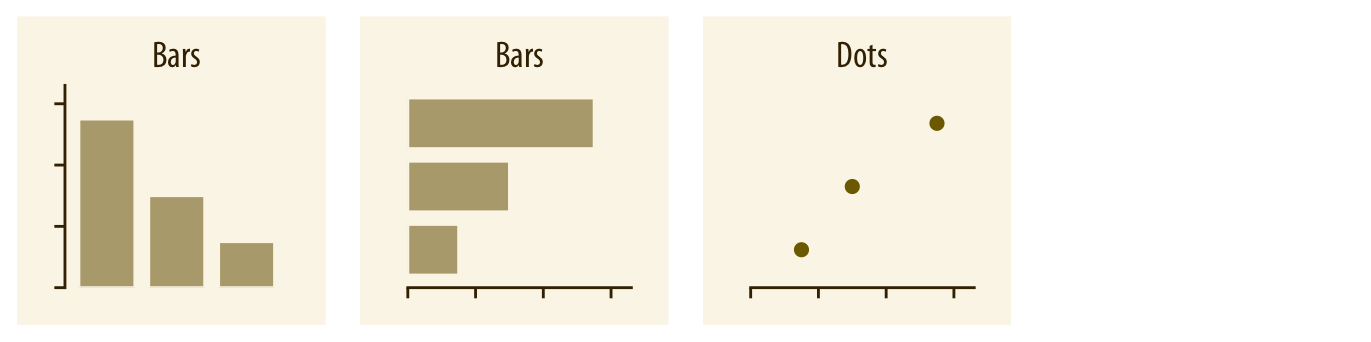

### Distribuições

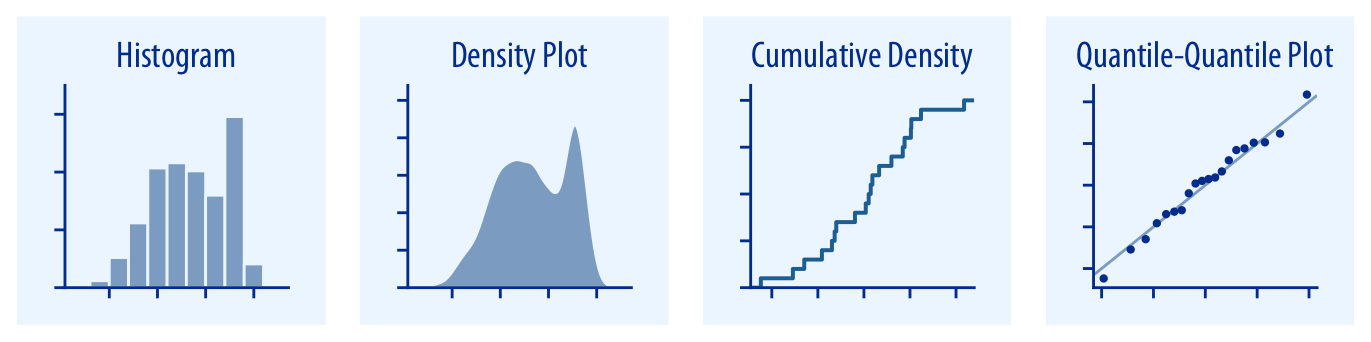

### Proporções

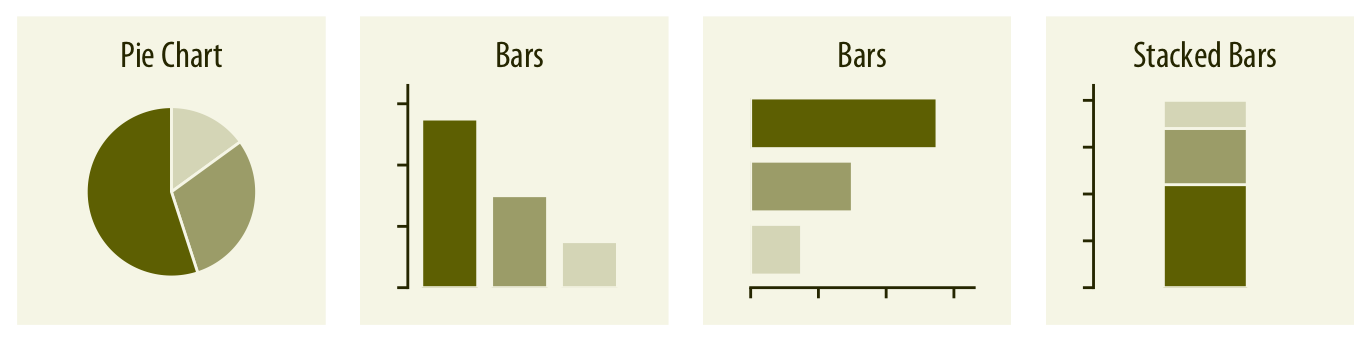
### Relacionamento (x-y)

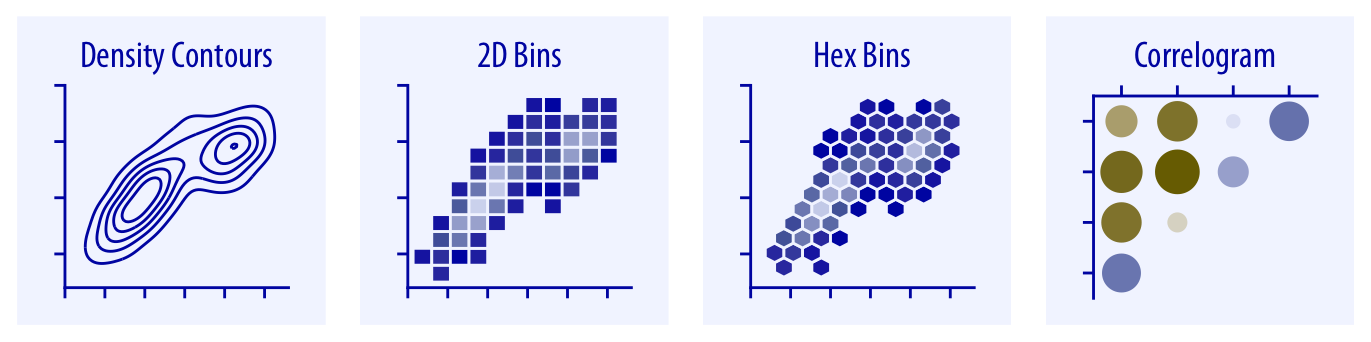

### Geoespacial

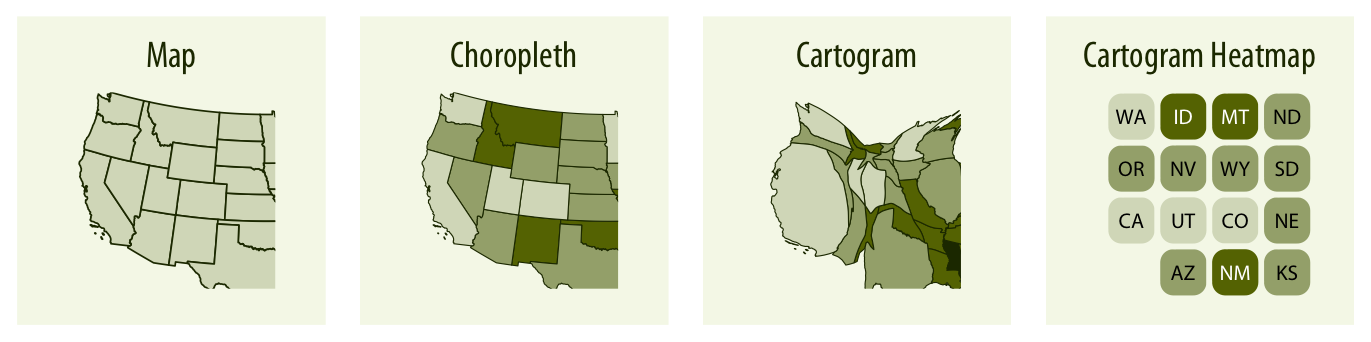

### Incerteza

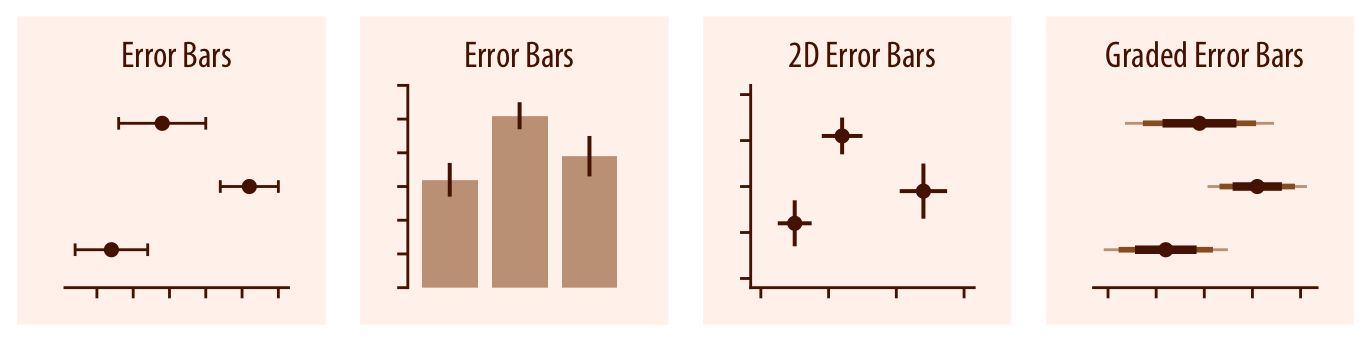


## Dados

Vamos utilizar como fonte de dados, um dataset dristribuído diretamente no Google Colab: `california_housing_data`.

- `longitude`: Uma medida de quanto à norte está a casa. Quanto maior o valor, mais à norte.

- `latitude`:	Uma medida de quanto ao oeste está a casa. Quanto maior o valor, mais ao oeste.

- `housingMedianAge`:	Idade mediana da casa, no mesmo quarteirão.	

- `totalRooms`:	Quantidade de cômodos no mesmo quarteirão.	

- `totalBedrooms`:	Quantidade de quartos no mesmo quarteirão.	

- `population`:	População residente no mesmo quarteirão.

- `households`:	Total de habitantes (um grupo de pessoas morando na mesma casa), por quarteirão.	

- `medianIncome`:	Renda mediana para os habitantes de um mesmo quarteirão, (medidos em dezenas de milhares de dólares).	

- `medianHouseValue`:	Valor mediano das casas no mesmo quarteirão (medido em dólares). **Usualmente, esse é o `target`.**

Referência: Pace, R. Kelley, and Ronald Barry, "Sparse Spatial Autoregressions," Statistics and Probability Letters, Volume 33, Number 3, May 5 1997, p. 291-297.

https://developers.google.com/machine-learning/crash-course/california-housing-data-description


In [6]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

In [7]:
california_housing = pd.read_csv('sample_data/california_housing_train.csv')

In [8]:
california_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


Vamos traduzir o nome das colunas...

In [9]:
california_housing.rename(columns={
    "housing_median_age": "idade_mediana", 
    "total_rooms": "total_de_comodos",
    "total_bedrooms": "total_de_quartos",
    "population": "populacao",
    "households": "residentes",
    "median_income": "renda_mediana",
    "median_house_value": "valor_mediano",
    }, inplace=True)

In [10]:
california_housing.describe()

,longitude,latitude,idade_mediana,total_de_comodos,total_de_quartos,populacao,residentes,renda_mediana,valor_mediano
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Quantidades

Abordagem mais comum.


In [11]:
buffer = california_housing.filter(['total_de_quartos', 'valor_mediano'])
buffer['bins'] = pd.cut(buffer['total_de_quartos'], 7)
buffer = buffer.groupby('bins').mean()
buffer

,total_de_quartos,valor_mediano
bins,,
"(-5.444, 921.571]",426.994439,205463.347478
"(921.571, 1842.143]",1224.887359,223139.220275
"(1842.143, 2762.714]",2215.409302,212797.716279
"(2762.714, 3683.286]",3128.642857,221614.285714
"(3683.286, 4603.857]",4121.500000,236855.555556
"(4603.857, 5524.429]",5047.833333,210933.333333
"(5524.429, 6445.0]",6445.000000,118800.000000


**Barra**

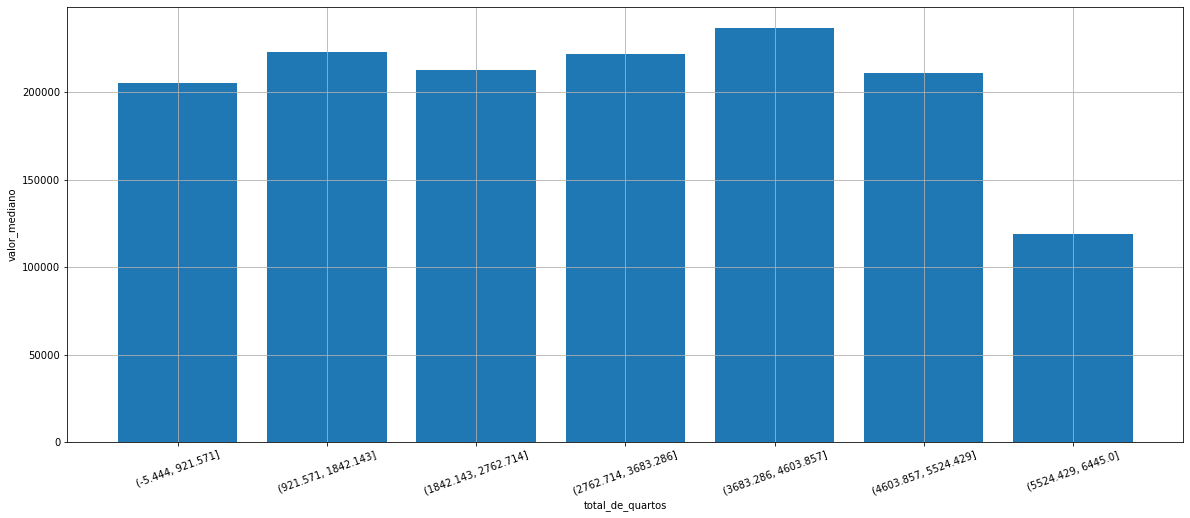

In [12]:
fig = plt.figure(figsize=(20,8)) # cria uma figura
ax = plt.axes() # adiciona um eixo na figura
 
ax.bar(range(buffer.index.size), buffer['valor_mediano'])

plt.xticks(range(buffer.index.size), buffer.index, rotation=20)

ax.grid()

ax.set_xlabel("total_de_quartos")
ax.set_ylabel("valor_mediano");

##### Como seria um gráfico de barras, horizontal?

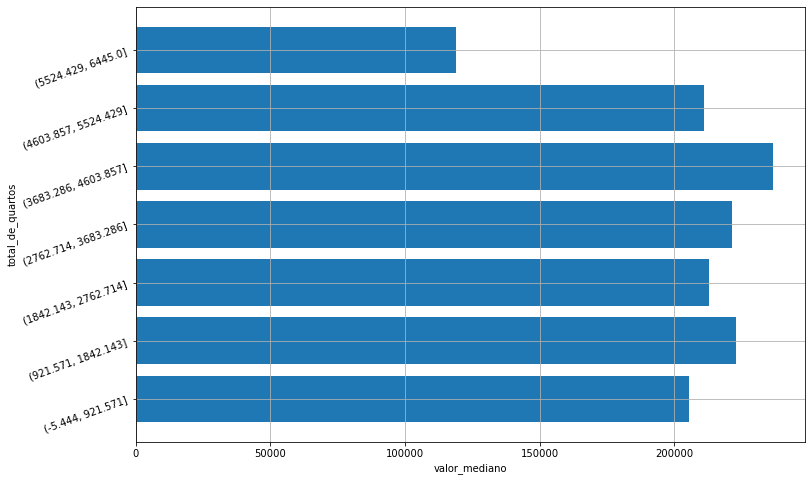

In [13]:
fig = plt.figure(figsize=(12,8)) # cria uma figura
ax = plt.axes() # adiciona um eixo na figura
 
ax.barh(range(buffer.index.size), buffer['valor_mediano'])

plt.yticks(range(buffer.index.size), buffer.index, rotation=20)

ax.grid()

ax.set_ylabel("total_de_quartos")
ax.set_xlabel("valor_mediano");

Ficou mais agradável?

##### **Histogramas**

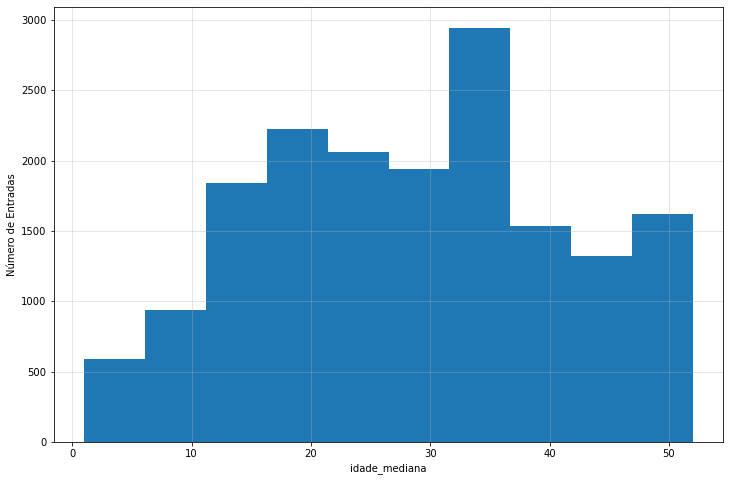

In [14]:
fig = plt.figure(figsize=(12,8)) # cria uma figura
ax = plt.axes() # adiciona um eixo na figura
 
variavel = 'idade_mediana'

ax.hist(california_housing[variavel], bins=10)

ax.grid(alpha=0.4)

ax.set_ylabel("Número de Entradas")
ax.set_xlabel(variavel);

Qual o número ideal de bins (divisões)?

##### **Distribuições Acumulativas**

No handles with labels found to put in legend.


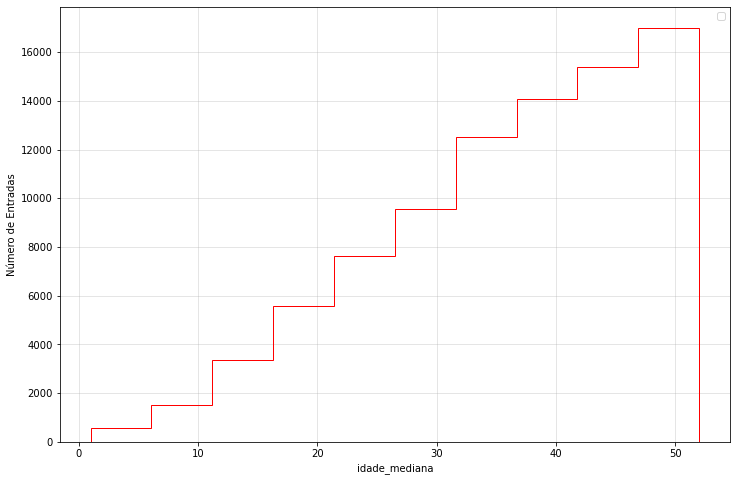

In [15]:
fig = plt.figure(figsize=(12,8)) # cria uma figura
ax = plt.axes() # adiciona um eixo na figura
 
variavel = 'idade_mediana'

ax.hist(california_housing[variavel], bins=10, histtype='step' , cumulative=True, color='red')

# vários histogramas 
# valor_de_corte = 265000
# n, bins, _ = ax.hist(california_housing[california_housing['valor_mediano'] < valor_de_corte][variavel], bins=10, histtype='step' , cumulative=False, color='red', label='Valor Mediano baixo', log=True)
# ax.hist(california_housing[california_housing['valor_mediano'] > valor_de_corte][variavel], bins=bins, histtype='step' , cumulative=False, color='blue', label='Valor Mediano alto', log=True)

ax.grid(alpha=0.4)

plt.legend()

ax.set_ylabel("Número de Entradas")
ax.set_xlabel(variavel);




##### **Scatter Plots**

Gráficos de associação.

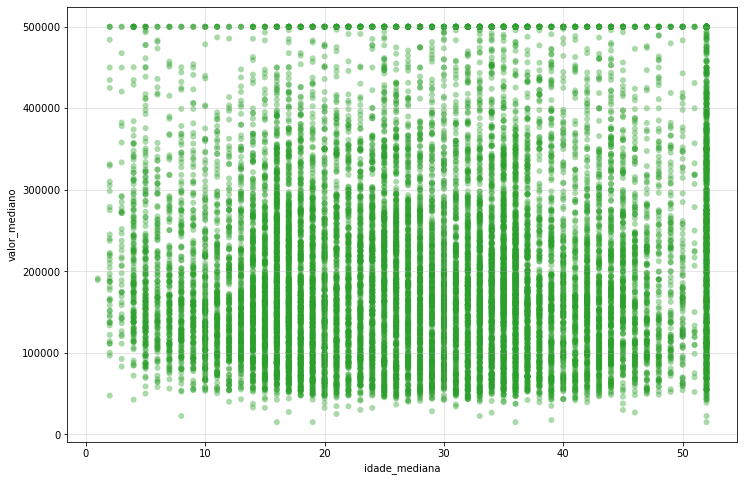

In [16]:


fig = plt.figure(figsize=(12,8)) # cria uma figura
ax = plt.axes() # adiciona um eixo na figura
 

variavel_x = 'idade_mediana'
variavel_y = 'valor_mediano'


# variavel_x = 'valor_mediano'
# variavel_y = 'renda_mediana'

ax.scatter(california_housing[variavel_x], california_housing[variavel_y], c='tab:green', alpha=0.4, edgecolors='none')

ax.grid(alpha=0.4)

ax.set_xlabel(variavel_x)
ax.set_ylabel(variavel_y);





##### **Bubble Plots**

Gráficos de associação com escala.

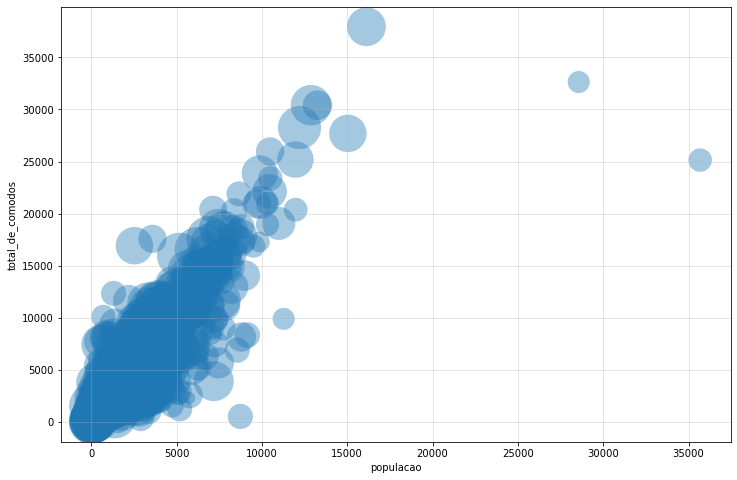

In [17]:
fig = plt.figure(figsize=(12,8)) # cria uma figura
ax = plt.axes() # adiciona um eixo na figura
 

variavel_x = 'populacao'
variavel_y = 'total_de_comodos'

# ax.scatter(california_housing[variavel_x], california_housing[variavel_y], s=1000, c='tab:blue', alpha=0.4, edgecolors='none')

variavel_z = 'valor_mediano'
buffer = california_housing.sample(10000)
scale = 2000/(buffer[variavel_z].max() - buffer[variavel_z].min())*buffer[variavel_z]

ax.scatter(buffer[variavel_x], buffer[variavel_y], s=scale, c='tab:blue', alpha=0.4, edgecolors='none')

ax.grid(alpha=0.4)


ax.set_xlabel(variavel_x)
ax.set_ylabel(variavel_y);


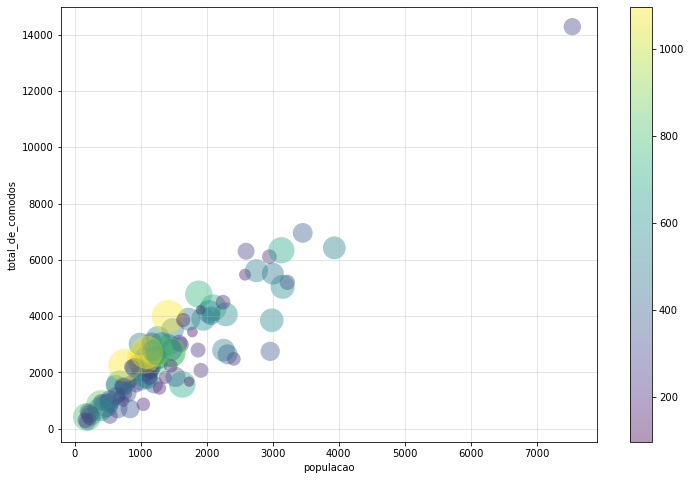

In [18]:
fig = plt.figure(figsize=(12,8)) # cria uma figura
ax = plt.axes() # adiciona um eixo na figura
 

variavel_x = 'populacao'
variavel_y = 'total_de_comodos'
variavel_z = 'valor_mediano'

buffer = california_housing.sample(100)
scale = 1000/(buffer[variavel_z].max() - buffer[variavel_z].min())*buffer[variavel_z]

plot = ax.scatter(buffer[variavel_x], buffer[variavel_y], s=scale, c=scale, alpha=0.4, edgecolors='none')
plt.colorbar(plot)

ax.grid(alpha=0.4)

ax.set_xlabel(variavel_x)
ax.set_ylabel(variavel_y);


##### **Geoespacial**

Explorando localização em um mapa.

California no Google Maps: https://goo.gl/maps/9YYGR8JCJexbpEBQ7

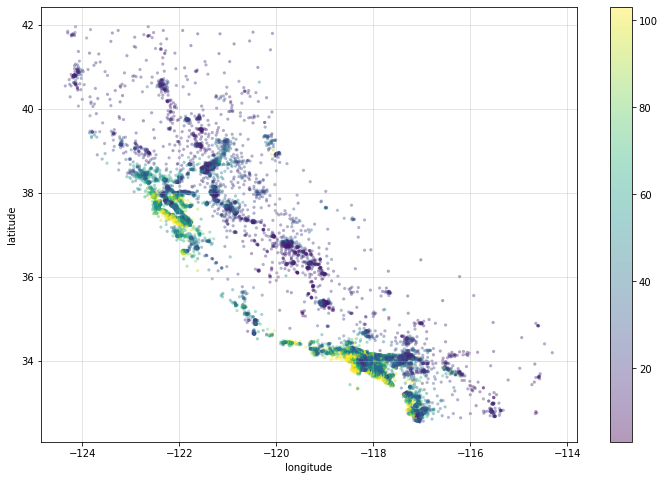

In [19]:
fig = plt.figure(figsize=(12,8)) # cria uma figura
ax = plt.axes() # adiciona um eixo na figura
 
variavel_x = 'longitude'
variavel_y = 'latitude'
variavel_z = 'valor_mediano'

buffer = california_housing
scale = 100/(buffer[variavel_z].max() - buffer[variavel_z].min())*buffer[variavel_z]

plot = ax.scatter(buffer[variavel_x], buffer[variavel_y], s=10, c=scale, alpha=0.4, edgecolors='none')
plt.colorbar(plot)

ax.grid(alpha=0.4)

ax.set_xlabel(variavel_x)
ax.set_ylabel(variavel_y);

In [29]:
#!wget https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/USA_California_location_map.svg/1000px-USA_California_location_map.svg.png
import urllib.request
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/USA_California_location_map.svg/1000px-USA_California_location_map.svg.png'
filename = 'images/1000px-USA_California_location_map.svg.png'
urllib.request.urlretrieve(url, filename);

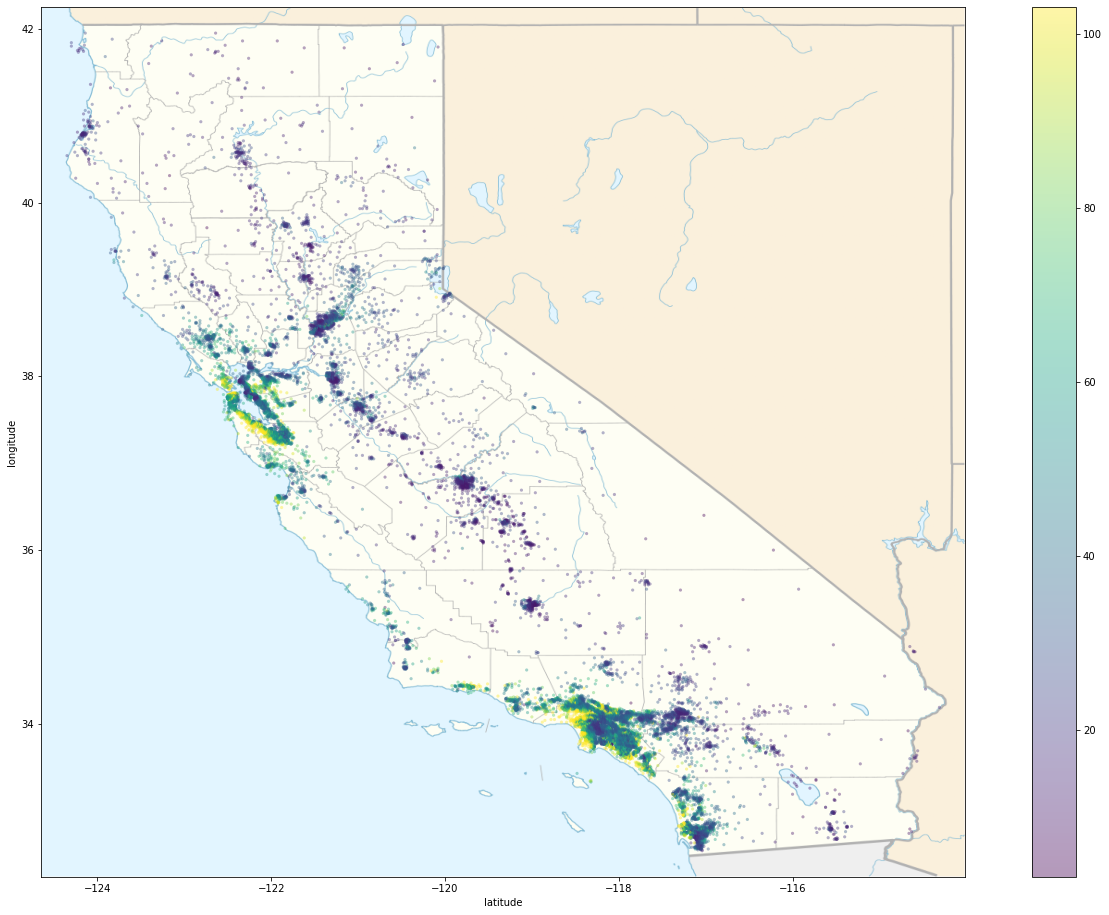

In [26]:
fig = plt.figure(figsize=(24,16)) # cria uma figura
ax = plt.axes() # adiciona um eixo na figura
 

import matplotlib.image as mpimg
california_img=mpimg.imread('1000px-USA_California_location_map.svg.png')
shift = 0.3
ax.imshow(california_img, extent=[california_housing['longitude'].min()-shift, california_housing['longitude'].max()+shift, california_housing['latitude'].min()-shift, california_housing['latitude'].max()+shift], alpha=0.5)


variavel_x = 'longitude'
variavel_y = 'latitude'
variavel_z = 'valor_mediano'


buffer = california_housing
scale = 100/(buffer[variavel_z].max() - buffer[variavel_z].min())*buffer[variavel_z]
plot = ax.scatter(buffer[variavel_x], buffer[variavel_y], s=10, c=scale, alpha=0.4, edgecolors='none')
plt.colorbar(plot)

ax.set_ylabel(variavel_x)
ax.set_xlabel(variavel_y);

### Desafio

Faça um bubble plot no mapa da California, como o anterior, porém com o tamanho da bolha proporcional à população e com a cor proporcional ao valor médio dos imóveis.

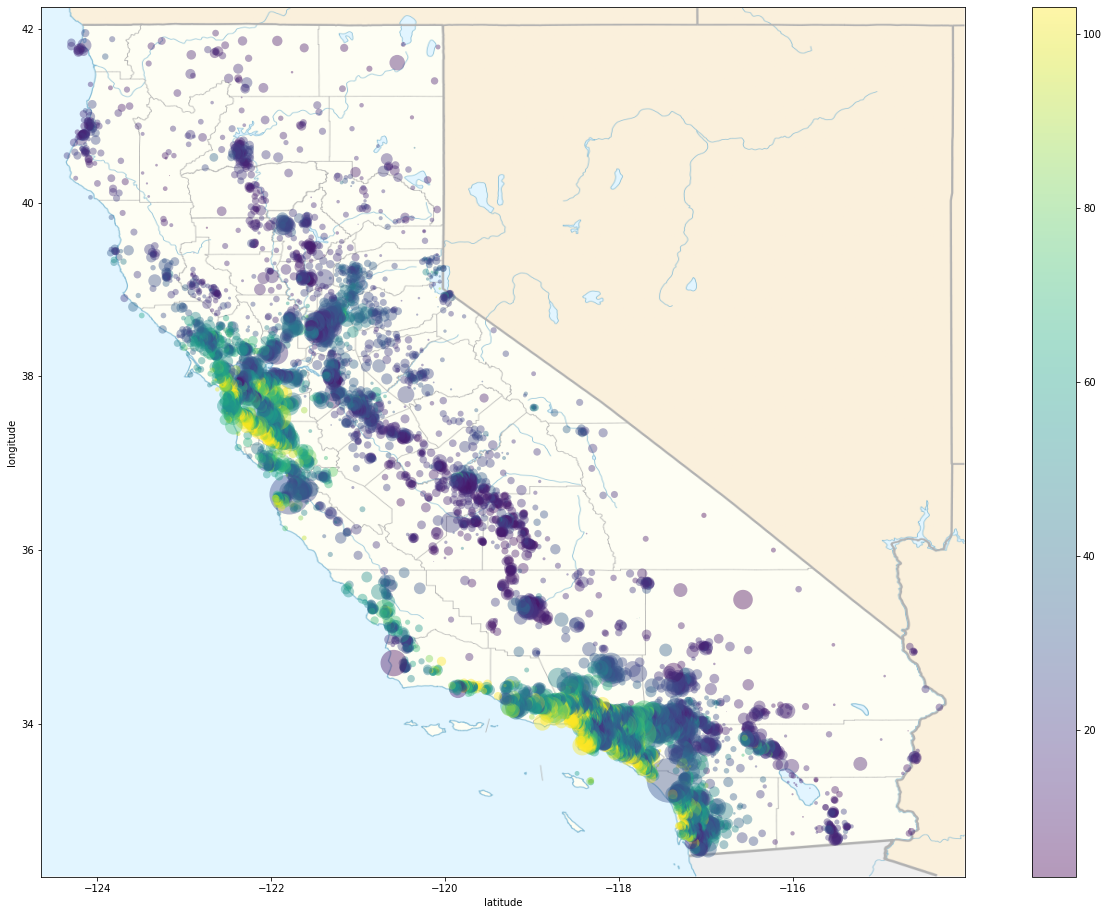

In [27]:
fig = plt.figure(figsize=(24,16)) # cria uma figura
ax = plt.axes() # adiciona um eixo na figura
 

import matplotlib.image as mpimg
california_img=mpimg.imread('1000px-USA_California_location_map.svg.png')
shift = 0.3
ax.imshow(california_img, extent=[california_housing['longitude'].min()-shift, california_housing['longitude'].max()+shift, california_housing['latitude'].min()-shift, california_housing['latitude'].max()+shift], alpha=0.5)


variavel_x = 'longitude'
variavel_y = 'latitude'
variavel_z = 'valor_mediano'


buffer = california_housing
scale_cor = 100/(buffer[variavel_z].max() - buffer[variavel_z].min())*buffer[variavel_z]
scale_tamanho = 2000/(buffer['populacao'].max() - buffer['populacao'].min())*buffer['populacao']

plot = ax.scatter(buffer[variavel_x], buffer[variavel_y], s=scale_tamanho, c=scale_cor, alpha=0.4, edgecolors='none')
plt.colorbar(plot)

ax.set_ylabel(variavel_x)
ax.set_xlabel(variavel_y);

#### Resposta

```python
fig = plt.figure(figsize=(24,16)) # cria uma figura
ax = plt.axes() # adiciona um eixo na figura
 

import matplotlib.image as mpimg
california_img=mpimg.imread('1000px-USA_California_location_map.svg.png')
shift = 0.3
ax.imshow(california_img, extent=[california_housing['longitude'].min()-shift, california_housing['longitude'].max()+shift, california_housing['latitude'].min()-shift, california_housing['latitude'].max()+shift], alpha=0.5)


variavel_x = 'longitude'
variavel_y = 'latitude'
variavel_z = 'valor_mediano'


buffer = california_housing
scale_cor = 100/(buffer[variavel_z].max() - buffer[variavel_z].min())*buffer[variavel_z]
scale_tamanho = 2000/(buffer['populacao'].max() - buffer['populacao'].min())*buffer['populacao']

plot = ax.scatter(buffer[variavel_x], buffer[variavel_y], s=scale_tamanho, c=scale_cor, alpha=0.4, edgecolors='none')
plt.colorbar(plot)

ax.set_ylabel(variavel_x)
ax.set_xlabel(variavel_y);
```